In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from keras.datasets import mnist


In [2]:
mnist_train_df=pd.read_csv('/content/drive/MyDrive/deep_learning_datasets/mnist_train.csv')

mnist_train_df.head(20)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
mnist_test_df = pd.read_csv('/content/drive/MyDrive/deep_learning_datasets/mnist_test.csv')

mnist_test_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist_train_df.dtypes

label    int64
1x1      int64
1x2      int64
1x3      int64
1x4      int64
         ...  
28x24    int64
28x25    int64
28x26    int64
28x27    int64
28x28    int64
Length: 785, dtype: object

In [5]:
import numpy as np
from numpy.ma.core import shape

x_train = mnist_train_df.copy()
x_train_new = np.array(x_train, ndmin= 2)

x_test = mnist_test_df.copy()
x_test_new = np.array(x_test, ndmin=2)

print(shape(x_test_new))
print(shape(x_train_new))
print("x_train 50",x_train_new[50])

(10000, 785)
(60000, 785)
x_train 50 [  3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  12  56 140
 126 175 200  96   2   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  35 166 238 254 246 242 253 246 254  67   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 184 182 146
 127  70  30  45  36 215 175   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  30   0   0   0   0   0   0   0 207 246  14
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  

In [6]:
y_train = mnist_train_df['label']
x_train = mnist_train_df.drop(['label'], axis = 1)
print("............X_Train data............")
print(x_train.head())
print("............Y_Train data.............")
print(y_train.head())

............X_Train data............
   1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
0    0    0    0    0    0    0    0    0    0     0  ...      0      0   
1    0    0    0    0    0    0    0    0    0     0  ...      0      0   
2    0    0    0    0    0    0    0    0    0     0  ...      0      0   
3    0    0    0    0    0    0    0    0    0     0  ...      0      0   
4    0    0    0    0    0    0    0    0    0     0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 784 columns]
............Y_Train data.............
0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64


In [7]:
y_test = mnist_test_df['label']
x_test = mnist_test_df.drop(['label'], axis = 1)
print("............X_Test data............")
print(x_test.head())
print("............Y_Test data............")
print(y_test.head())

............X_Test data............
   1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
0    0    0    0    0    0    0    0    0    0     0  ...      0      0   
1    0    0    0    0    0    0    0    0    0     0  ...      0      0   
2    0    0    0    0    0    0    0    0    0     0  ...      0      0   
3    0    0    0    0    0    0    0    0    0     0  ...      0      0   
4    0    0    0    0    0    0    0    0    0     0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 784 columns]
............Y_Test data............
0    7
1    2
2    1
3    0
4    4
Name: label, dtype: int64


In [8]:
x_train = x_train.values.reshape(-1, 28, 28, 1)/255.0
x_test = x_test.values.reshape(-1, 28, 28, 1)/255.0
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

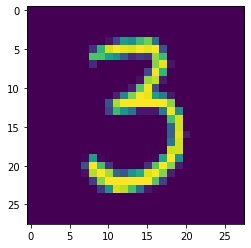

In [9]:
plt.imshow(x_train[50][:,:,0])

In [10]:
#import tensorflow.keras as keras
from keras import utils

#print("y_train value in 1000 =",y_train[1000])

#x_train = keras.utils.normalize(x_train, axis = 1)
#x_test = keras.utils.normalize(x_test, axis=1)
#print(x_train[0])

In [11]:
from numpy import matrix
import tensorflow as tf
mymodel = tf.keras.models.Sequential()
mymodel.add(tf.keras.layers.Flatten())
#mymodel.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
#mymodel.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
mymodel.add(tf.keras.layers.Dense(128, activation= tf.nn.softmax))
mymodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
mymodel.fit(x_train, y_train, epochs = 3 )

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5025 - accuracy: 0.8753
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3039 - accuracy: 0.9151
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2831 - accuracy: 0.9211


In [12]:
print("total layers = ",len(mymodel.layers))
mymodel.summary()

total layers =  2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (32, 784)                 0         
                                                                 
 dense (Dense)               (32, 128)                 100480    
                                                                 
Total params: 100,480
Trainable params: 100,480
Non-trainable params: 0
_________________________________________________________________


In [13]:
val_loss ,val_acc = mymodel.evaluate(x_test, y_test)
print("val_loss = ",val_loss)
print("accuracy = ",val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2743 - accuracy: 0.9227
val_loss =  0.2742653787136078
accuracy =  0.9226999878883362


..............Prediction..............
[[1.01861988e-05 3.64881098e-10 2.07156390e-05 ... 1.30721602e-08
  4.48614790e-09 3.95858901e-09]
 [6.80517172e-04 7.35390722e-06 9.90910470e-01 ... 1.82880100e-10
  3.25654864e-10 2.34518221e-11]
 [5.60626404e-06 9.73229110e-01 1.18256072e-02 ... 3.90634887e-06
  3.00047350e-06 2.15752516e-06]
 ...
 [8.34277856e-08 6.19877412e-08 1.04685405e-05 ... 1.43162288e-10
  3.94127196e-11 5.61078718e-11]
 [6.09805420e-06 5.78883783e-06 3.36868015e-06 ... 2.85722251e-10
  2.26839422e-10 6.74246284e-11]
 [1.25158567e-05 1.36945728e-12 8.01099959e-05 ... 4.61063886e-14
  1.04610670e-13 1.18738713e-14]]
6


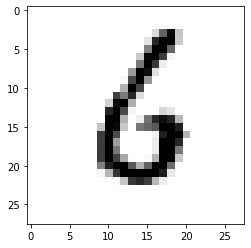

In [14]:
prediction = mymodel.predict(x_test)
print("..............Prediction..............")
print(prediction)

import numpy as np

print(np.argmax(prediction[50]))

plt.imshow(x_test[50][:,:,0],cmap=plt.cm.binary)
plt.show()